In [1]:
import os

import numpy as np
from IPython.display import HTML, display
import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
types = [['./data/hop/ga-dem10_r25_1_0.json', './data/hop/ga-dem1_r25_1_0.json', './data/hop/ga-dem2_r25_1_0.json', './data/hop/ga-dem3_r25_1_0.json', './data/hop/ga-dem4_r25_1_0.json', './data/hop/ga-dem5_r25_1_0.json', './data/hop/ga-dem6_r25_1_0.json', './data/hop/ga-dem7_r25_1_0.json', './data/hop/ga-dem8_r25_1_0.json', './data/hop/ga-dem9_r25_1_0.json', './data/layer/ga-dem10_r25_1.json', './data/layer/ga-dem1_r25_1.json', './data/layer/ga-dem2_r25_1.json', './data/layer/ga-dem3_r25_1.json', './data/layer/ga-dem4_r25_1.json', './data/layer/ga-dem5_r25_1.json', './data/layer/ga-dem6_r25_1.json', './data/layer/ga-dem7_r25_1.json', './data/layer/ga-dem8_r25_1.json', './data/layer/ga-dem9_r25_1.json'], ['./data/hop/no-dem10_r25_1_0.json', './data/hop/no-dem1_r25_1_0.json', './data/hop/no-dem2_r25_1_0.json', './data/hop/no-dem3_r25_1_0.json', './data/hop/no-dem4_r25_1_0.json', './data/hop/no-dem5_r25_1_0.json', './data/hop/no-dem6_r25_1_0.json', './data/hop/no-dem7_r25_1_0.json', './data/hop/no-dem8_r25_1_0.json', './data/hop/no-dem9_r25_1_0.json', './data/layer/no-dem10_r25_1.json', './data/layer/no-dem1_r25_1.json', './data/layer/no-dem2_r25_1.json', './data/layer/no-dem3_r25_1.json', './data/layer/no-dem4_r25_1.json', './data/layer/no-dem5_r25_1.json', './data/layer/no-dem6_r25_1.json', './data/layer/no-dem7_r25_1.json', './data/layer/no-dem8_r25_1.json', './data/layer/no-dem9_r25_1.json'], ['./data/hop/uu-dem10_r25_1_0.json', './data/hop/uu-dem1_r25_1_0.json', './data/hop/uu-dem2_r25_1_0.json', './data/hop/uu-dem3_r25_1_0.json', './data/hop/uu-dem4_r25_1_0.json', './data/hop/uu-dem5_r25_1_0.json', './data/hop/uu-dem6_r25_1_0.json', './data/hop/uu-dem7_r25_1_0.json', './data/hop/uu-dem8_r25_1_0.json', './data/hop/uu-dem9_r25_1_0.json', './data/layer/uu-dem10_r25_1.json', './data/layer/uu-dem1_r25_1.json', './data/layer/uu-dem2_r25_1.json', './data/layer/uu-dem3_r25_1.json', './data/layer/uu-dem4_r25_1.json', './data/layer/uu-dem5_r25_1.json', './data/layer/uu-dem6_r25_1.json', './data/layer/uu-dem7_r25_1.json', './data/layer/uu-dem8_r25_1.json', './data/layer/uu-dem9_r25_1.json'], ['./data/hop/uu-dem10_r50_1_0.json', './data/hop/uu-dem1_r50_1_0.json', './data/hop/uu-dem2_r50_1_0.json', './data/hop/uu-dem3_r50_1_0.json', './data/hop/uu-dem4_r50_1_0.json', './data/hop/uu-dem5_r50_1_0.json', './data/hop/uu-dem6_r50_1_0.json', './data/hop/uu-dem7_r50_1_0.json', './data/hop/uu-dem8_r50_1_0.json', './data/hop/uu-dem9_r50_1_0.json', './data/layer/uu-dem10_r50_1.json', './data/layer/uu-dem1_r50_1.json', './data/layer/uu-dem2_r50_1.json', './data/layer/uu-dem3_r50_1.json', './data/layer/uu-dem4_r50_1.json', './data/layer/uu-dem5_r50_1.json', './data/layer/uu-dem6_r50_1.json', './data/layer/uu-dem7_r50_1.json', './data/layer/uu-dem8_r50_1.json', './data/layer/uu-dem9_r50_1.json'], ['./data/hop/uu-dem10_r25_1_40.json', './data/hop/uu-dem1_r25_1_40.json', './data/hop/uu-dem2_r25_1_40.json', './data/hop/uu-dem3_r25_1_40.json', './data/hop/uu-dem4_r25_1_40.json', './data/hop/uu-dem5_r25_1_40.json', './data/hop/uu-dem6_r25_1_40.json', './data/hop/uu-dem7_r25_1_40.json', './data/hop/uu-dem8_r25_1_40.json', './data/hop/uu-dem9_r25_1_40.json', './data/layer/uu-dem10_r25_1.json', './data/layer/uu-dem1_r25_1.json', './data/layer/uu-dem2_r25_1.json', './data/layer/uu-dem3_r25_1.json', './data/layer/uu-dem4_r25_1.json', './data/layer/uu-dem5_r25_1.json', './data/layer/uu-dem6_r25_1.json', './data/layer/uu-dem7_r25_1.json', './data/layer/uu-dem8_r25_1.json', './data/layer/uu-dem9_r25_1.json']]


In [3]:
def rcoeff(X, Y):
    Xmean, Ymean = np.mean(X), np.mean(Y)
    det = sum([(tmp1 - Xmean)*(tmp2 - Ymean) for tmp1, tmp2 in zip(X, Y)])
    nom = np.sqrt(sum([(tmp - Xmean)**2 for tmp in X]))*np.sqrt(sum([(tmp - Ymean)**2 for tmp in Y]))
    
    return det/nom

In [4]:
n = 20

def type_similarity_table(idx):
    data = np.load(f'task-sim-{idx}/99.npy')
    table = []

    for i in range(20):
        row = []
        for j in range(20):
            row.append(rcoeff(data[i], data[j]))
        table.append(row)
        
    return table
    
def pick(indx, table, tests, single, multi):
    single_tests, multi_tests = [], []
    order = np.argsort(table[indx])[::-1]
    i = 0
    while len(single_tests) < single and i < n:
        if order[i] >= 10:
            single_tests.append(order[i])
        i += 1
    
    i = 0
    while len(multi_tests) < multi and i < n:
        if order[i] < 10:
            multi_tests.append(order[i])
        i += 1
    single_tests = [os.path.join('./data/layer', tests[tmp]) for tmp in single_tests]
    multi_tests = [os.path.join('./data/hop', tests[tmp]) for tmp in multi_tests]

    return single_tests + multi_tests
    
for t in range(5):
    table = type_similarity_table(t)
    tests = [tmp.split('/')[-1] for tmp in types[t]]
    for i in range(n):
        for task in [(1,1), (3,1), (1,3), (3,3)]:
            for j in range(5):
                out = f'{tests[i][:-5]}_{j}.txt'
                fns = ' '.join(pick(i, table, tests, *task))
                print(f'{fns}\t{out}')

./data/layer/ga-dem10_r25_1.json ./data/hop/ga-dem10_r25_1_0.json	ga-dem10_r25_1_0_0.txt
./data/layer/ga-dem10_r25_1.json ./data/hop/ga-dem10_r25_1_0.json	ga-dem10_r25_1_0_1.txt
./data/layer/ga-dem10_r25_1.json ./data/hop/ga-dem10_r25_1_0.json	ga-dem10_r25_1_0_2.txt
./data/layer/ga-dem10_r25_1.json ./data/hop/ga-dem10_r25_1_0.json	ga-dem10_r25_1_0_3.txt
./data/layer/ga-dem10_r25_1.json ./data/hop/ga-dem10_r25_1_0.json	ga-dem10_r25_1_0_4.txt
./data/layer/ga-dem10_r25_1.json ./data/layer/ga-dem6_r25_1.json ./data/layer/ga-dem2_r25_1.json ./data/hop/ga-dem10_r25_1_0.json	ga-dem10_r25_1_0_0.txt
./data/layer/ga-dem10_r25_1.json ./data/layer/ga-dem6_r25_1.json ./data/layer/ga-dem2_r25_1.json ./data/hop/ga-dem10_r25_1_0.json	ga-dem10_r25_1_0_1.txt
./data/layer/ga-dem10_r25_1.json ./data/layer/ga-dem6_r25_1.json ./data/layer/ga-dem2_r25_1.json ./data/hop/ga-dem10_r25_1_0.json	ga-dem10_r25_1_0_2.txt
./data/layer/ga-dem10_r25_1.json ./data/layer/ga-dem6_r25_1.json ./data/layer/ga-dem2_r25_1.json

./data/layer/no-dem7_r25_1.json ./data/hop/no-dem10_r25_1_0.json	no-dem10_r25_1_0_0.txt
./data/layer/no-dem7_r25_1.json ./data/hop/no-dem10_r25_1_0.json	no-dem10_r25_1_0_1.txt
./data/layer/no-dem7_r25_1.json ./data/hop/no-dem10_r25_1_0.json	no-dem10_r25_1_0_2.txt
./data/layer/no-dem7_r25_1.json ./data/hop/no-dem10_r25_1_0.json	no-dem10_r25_1_0_3.txt
./data/layer/no-dem7_r25_1.json ./data/hop/no-dem10_r25_1_0.json	no-dem10_r25_1_0_4.txt
./data/layer/no-dem7_r25_1.json ./data/layer/no-dem4_r25_1.json ./data/layer/no-dem10_r25_1.json ./data/hop/no-dem10_r25_1_0.json	no-dem10_r25_1_0_0.txt
./data/layer/no-dem7_r25_1.json ./data/layer/no-dem4_r25_1.json ./data/layer/no-dem10_r25_1.json ./data/hop/no-dem10_r25_1_0.json	no-dem10_r25_1_0_1.txt
./data/layer/no-dem7_r25_1.json ./data/layer/no-dem4_r25_1.json ./data/layer/no-dem10_r25_1.json ./data/hop/no-dem10_r25_1_0.json	no-dem10_r25_1_0_2.txt
./data/layer/no-dem7_r25_1.json ./data/layer/no-dem4_r25_1.json ./data/layer/no-dem10_r25_1.json ./da

./data/layer/uu-dem10_r25_1.json ./data/hop/uu-dem10_r25_1_0.json	uu-dem10_r25_1_0_0.txt
./data/layer/uu-dem10_r25_1.json ./data/hop/uu-dem10_r25_1_0.json	uu-dem10_r25_1_0_1.txt
./data/layer/uu-dem10_r25_1.json ./data/hop/uu-dem10_r25_1_0.json	uu-dem10_r25_1_0_2.txt
./data/layer/uu-dem10_r25_1.json ./data/hop/uu-dem10_r25_1_0.json	uu-dem10_r25_1_0_3.txt
./data/layer/uu-dem10_r25_1.json ./data/hop/uu-dem10_r25_1_0.json	uu-dem10_r25_1_0_4.txt
./data/layer/uu-dem10_r25_1.json ./data/layer/uu-dem4_r25_1.json ./data/layer/uu-dem1_r25_1.json ./data/hop/uu-dem10_r25_1_0.json	uu-dem10_r25_1_0_0.txt
./data/layer/uu-dem10_r25_1.json ./data/layer/uu-dem4_r25_1.json ./data/layer/uu-dem1_r25_1.json ./data/hop/uu-dem10_r25_1_0.json	uu-dem10_r25_1_0_1.txt
./data/layer/uu-dem10_r25_1.json ./data/layer/uu-dem4_r25_1.json ./data/layer/uu-dem1_r25_1.json ./data/hop/uu-dem10_r25_1_0.json	uu-dem10_r25_1_0_2.txt
./data/layer/uu-dem10_r25_1.json ./data/layer/uu-dem4_r25_1.json ./data/layer/uu-dem1_r25_1.json

./data/layer/uu-dem3_r50_1.json ./data/hop/uu-dem10_r50_1_0.json	uu-dem10_r50_1_0_0.txt
./data/layer/uu-dem3_r50_1.json ./data/hop/uu-dem10_r50_1_0.json	uu-dem10_r50_1_0_1.txt
./data/layer/uu-dem3_r50_1.json ./data/hop/uu-dem10_r50_1_0.json	uu-dem10_r50_1_0_2.txt
./data/layer/uu-dem3_r50_1.json ./data/hop/uu-dem10_r50_1_0.json	uu-dem10_r50_1_0_3.txt
./data/layer/uu-dem3_r50_1.json ./data/hop/uu-dem10_r50_1_0.json	uu-dem10_r50_1_0_4.txt
./data/layer/uu-dem3_r50_1.json ./data/layer/uu-dem2_r50_1.json ./data/layer/uu-dem7_r50_1.json ./data/hop/uu-dem10_r50_1_0.json	uu-dem10_r50_1_0_0.txt
./data/layer/uu-dem3_r50_1.json ./data/layer/uu-dem2_r50_1.json ./data/layer/uu-dem7_r50_1.json ./data/hop/uu-dem10_r50_1_0.json	uu-dem10_r50_1_0_1.txt
./data/layer/uu-dem3_r50_1.json ./data/layer/uu-dem2_r50_1.json ./data/layer/uu-dem7_r50_1.json ./data/hop/uu-dem10_r50_1_0.json	uu-dem10_r50_1_0_2.txt
./data/layer/uu-dem3_r50_1.json ./data/layer/uu-dem2_r50_1.json ./data/layer/uu-dem7_r50_1.json ./data/h

./data/layer/uu-dem1_r25_1.json ./data/hop/uu-dem10_r25_1_40.json	uu-dem10_r25_1_40_0.txt
./data/layer/uu-dem1_r25_1.json ./data/hop/uu-dem10_r25_1_40.json	uu-dem10_r25_1_40_1.txt
./data/layer/uu-dem1_r25_1.json ./data/hop/uu-dem10_r25_1_40.json	uu-dem10_r25_1_40_2.txt
./data/layer/uu-dem1_r25_1.json ./data/hop/uu-dem10_r25_1_40.json	uu-dem10_r25_1_40_3.txt
./data/layer/uu-dem1_r25_1.json ./data/hop/uu-dem10_r25_1_40.json	uu-dem10_r25_1_40_4.txt
./data/layer/uu-dem1_r25_1.json ./data/layer/uu-dem5_r25_1.json ./data/layer/uu-dem7_r25_1.json ./data/hop/uu-dem10_r25_1_40.json	uu-dem10_r25_1_40_0.txt
./data/layer/uu-dem1_r25_1.json ./data/layer/uu-dem5_r25_1.json ./data/layer/uu-dem7_r25_1.json ./data/hop/uu-dem10_r25_1_40.json	uu-dem10_r25_1_40_1.txt
./data/layer/uu-dem1_r25_1.json ./data/layer/uu-dem5_r25_1.json ./data/layer/uu-dem7_r25_1.json ./data/hop/uu-dem10_r25_1_40.json	uu-dem10_r25_1_40_2.txt
./data/layer/uu-dem1_r25_1.json ./data/layer/uu-dem5_r25_1.json ./data/layer/uu-dem7_r25

In [23]:
def type_similarity_table(idx):
    data = np.load(f'task-sim-{idx}/99.npy')
    table = []

    for i in range(20):
        row = []
        for j in range(20):
            row.append(rcoeff(data[i], data[j]))
        table.append(row)
        
    return table

In [24]:
def transform_test_name(s):
    s = s.split('/')[-1]
    
    distribution = s.split('-')[0]
    r = s.split('_')[1][1:]
    dem = s.split('_')[0].split('-')[-1].replace('dem', '')

    output = distribution + r + '_' + dem

    if len(s.split('_')) == 4:
        output += 'm' #'_' + s.split('_')[-1].replace('.json', '')
    else:
        output += 's'
        
    return output
        
    
# transform_input(types[0][0])

In [26]:
def draw_heat_map(type_idx):
    table = type_similarity_table(type_idx)
    tests = [transform_test_name(tmp) for tmp in types[type_idx]]
    table = np.rot90(np.array(table))
    print(tests)
    ax = sns.heatmap(np.array(table), xticklabels=tests, yticklabels=tests[::-1], linewidth=1)
    plt.savefig(f'{type_idx}.eps', format='eps', bbox_inches='tight')
    plt.show()

['ga25_10m', 'ga25_1m', 'ga25_2m', 'ga25_3m', 'ga25_4m', 'ga25_5m', 'ga25_6m', 'ga25_7m', 'ga25_8m', 'ga25_9m', 'ga25_10s', 'ga25_1s', 'ga25_2s', 'ga25_3s', 'ga25_4s', 'ga25_5s', 'ga25_6s', 'ga25_7s', 'ga25_8s', 'ga25_9s']


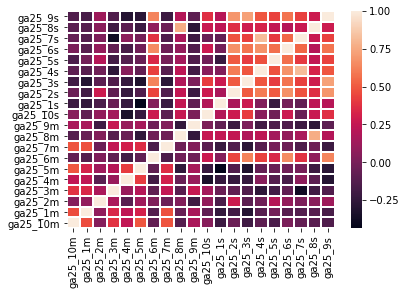

In [27]:
draw_heat_map(0)

['no25_10m', 'no25_1m', 'no25_2m', 'no25_3m', 'no25_4m', 'no25_5m', 'no25_6m', 'no25_7m', 'no25_8m', 'no25_9m', 'no25_10s', 'no25_1s', 'no25_2s', 'no25_3s', 'no25_4s', 'no25_5s', 'no25_6s', 'no25_7s', 'no25_8s', 'no25_9s']


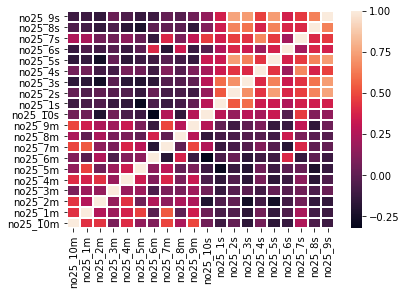

In [28]:
draw_heat_map(1)

['uu25_10m', 'uu25_1m', 'uu25_2m', 'uu25_3m', 'uu25_4m', 'uu25_5m', 'uu25_6m', 'uu25_7m', 'uu25_8m', 'uu25_9m', 'uu25_10s', 'uu25_1s', 'uu25_2s', 'uu25_3s', 'uu25_4s', 'uu25_5s', 'uu25_6s', 'uu25_7s', 'uu25_8s', 'uu25_9s']


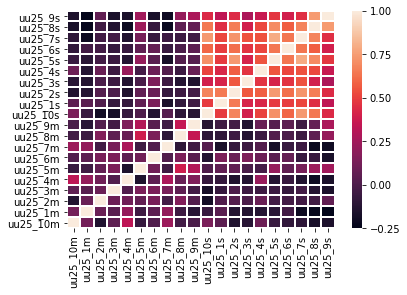

In [29]:
draw_heat_map(2)

['uu50_10m', 'uu50_1m', 'uu50_2m', 'uu50_3m', 'uu50_4m', 'uu50_5m', 'uu50_6m', 'uu50_7m', 'uu50_8m', 'uu50_9m', 'uu50_10s', 'uu50_1s', 'uu50_2s', 'uu50_3s', 'uu50_4s', 'uu50_5s', 'uu50_6s', 'uu50_7s', 'uu50_8s', 'uu50_9s']


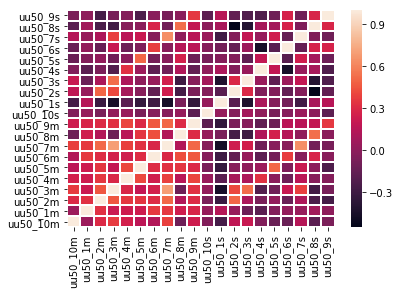

In [30]:
draw_heat_map(3)

['uu25_10m', 'uu25_1m', 'uu25_2m', 'uu25_3m', 'uu25_4m', 'uu25_5m', 'uu25_6m', 'uu25_7m', 'uu25_8m', 'uu25_9m', 'uu25_10s', 'uu25_1s', 'uu25_2s', 'uu25_3s', 'uu25_4s', 'uu25_5s', 'uu25_6s', 'uu25_7s', 'uu25_8s', 'uu25_9s']


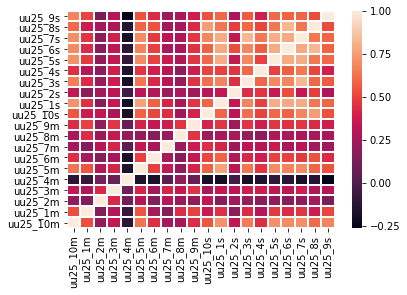

In [31]:
draw_heat_map(4)